In [1]:
# Training the model and test it 
#    Objectif: building a performed model with SVM algorithm 
#    Input: 
#     preprocessed data without PCA and best parameters:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#   
#   Output:
#    builded model 

#    Author: NARGES ROKNI 



In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings

#Split data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Test confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, auc

#tuning parameters
from sklearn.model_selection import RandomizedSearchCV

#subplot
from pylab import *

#warning ignore
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Accuracy
from sklearn.metrics import precision_recall_fscore_support

In [11]:
####################################    BUILDING MODEL     ################################
######################################  Functions ######################################

import itertools

def drawConfusionMatrix(cm, ax):
    labels = ['Not Fraud', 'Fraud']
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="YlGnBu")
    ax.set_title("Confusion Matrix")



def drawAUC(fpr,tpr,roc_auc,ax):
    ax.plot(fpr, tpr, color='grey', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    ax.grid()

def drawDecisionBoundary(model,x,y):
    print("Draw decision boundary for multidimension")
    
def printModel(model,x,y, y_pred):
    
    print('Percent Accuracy: {:.3f}% \n'.format(model.score(x, y)*100))
    
    CM = confusion_matrix(y, y_pred)
    CR=  classification_report(y, y_pred)
    FPR, TPR, thresholds=roc_curve(y, y_pred)
    AUC= auc(FPR, TPR)
    
    results = {"Confusion Matrix":CM,"Classification Report":CR,"Area Under Curve":AUC}
    
    for m in results:
        print(m,": \n",results[m],"\n")
    
    f, ax = plt.subplots(1,2,figsize=(15,5))
    drawConfusionMatrix(CM, ax[0])
    drawAUC(FPR,TPR,AUC,ax[1])
    plt.show()
    

def runModel(name, model, trainX, trainY, testX, testY):
    
    print('=' * 20, name, '=' * 20)
    start_time = time.time()
    
    model.fit(trainX,trainY)
    print("--- Model Fitting in %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    y_pred = model.predict(testX)
    print("--- Model Predicting in %s seconds ---" % (time.time() - start_time))
    print("\n\n")
    printModel(model, testX, testY, y_pred)
    
    
    #plot_decision_boundary(model, X=trainX, Y=trainY)
    
    
  

In [19]:
######################################   LOAD unbalanced PCA DATA:   ################################

X_train_pca = np.genfromtxt('../../data/pca/x_pca_train.csv', delimiter=',')
X_test = np.genfromtxt('../../data/pca/x_pca_test.csv', delimiter=',')
Y_train=np.genfromtxt('../../data/y_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../data/y_test.csv', delimiter=',')
X_train_pca.shape

(1660852, 4)

==================== SVM linear ====================
--- Model Fitting in 0.513681173324585 seconds ---
--- Model Predicting in 1.3366239070892334 seconds ---



Percent Accuracy: 99.706% 



C:\Users\souad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
 [[1103984       0]
 [   3252       0]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.00      0.00      0.00      3252

avg / total       0.99      1.00      1.00   1107236
 

Area Under Curve : 
 0.5 



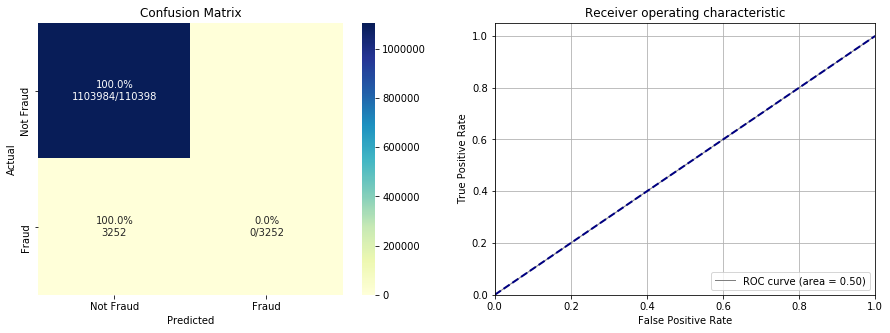

In [12]:
################################ Train and Test Models #############################
#################################   Linear SVM PCA   #############################

####### Before tuning
classifier = SVC(kernel = 'linear', random_state = 0)
runModel('SVM linear', classifier, X_train_pca[:16000], Y_train[:16000], X_test, Y_test)


==================== SVM with PCA ====================
--- Model Fitting in 5.734352111816406 seconds ---
--- Model Predicting in 0.031241893768310547 seconds ---



Percent Accuracy: 99.095% 

Confusion Matrix : 
 [[1096890    7094]
 [   2923     329]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      0.99      1.00   1103984
        1.0       0.04      0.10      0.06      3252

avg / total       0.99      0.99      0.99   1107236
 

Area Under Curve : 
 0.547371346959821 



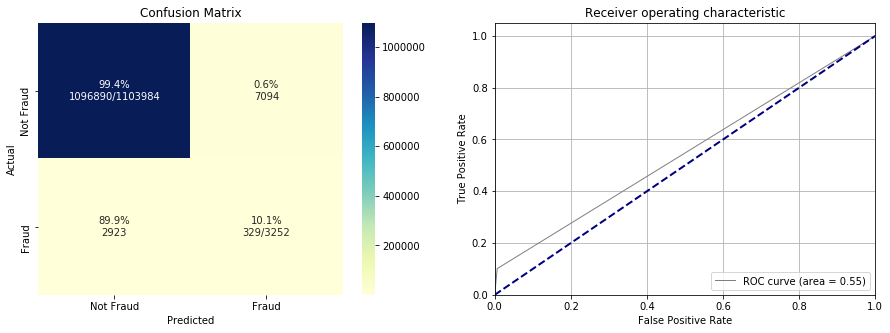

In [20]:
################################ Train and Test Models #############################
#################################   Linear SGD with 'hinge loss'    #############################

####### Before tuning

#SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier
#equal to hinge will yield behaviour such as that of a SVC with a linear kernel

from sklearn import linear_model

classifier = linear_model.SGDClassifier(loss='hinge', 
                                        penalty='l2',
                                        alpha=1e-3, random_state=42,
                                        max_iter=20)
runModel('SVM with PCA', classifier, X_train_pca, Y_train, X_test, Y_test)


In [7]:
################################Tuning parameters####################

# Tuning training parameters using Grid Search for feature extraction and ml algorithm
from sklearn.model_selection import GridSearchCV
 
parameters = {'loss':['hinge'],
              'penalty':['l2'],
              'random_state':[30,43],
              'max_iter': [20,50],
              'alpha': [1e-2, 1e-3]}

grid_search = GridSearchCV(estimator = classifier,  param_grid = parameters, n_jobs=-1,scoring = 'roc_auc', cv = 10)
grid_search=grid_search.fit(X_train_pca, Y_train)

best_auc = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Score :',best_auc,'\nBest_parameters :',best_parameters)



Best Score : 0.7373539350827325 
Best_parameters : {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 20, 'penalty': 'l2', 'random_state': 43}


In [17]:
######################################   LOAD unbalanced DATA without PCA:   ################################

X_train = np.genfromtxt('../../data/x_train.csv', delimiter=',')
X_test = np.genfromtxt('../../data/x_test.csv', delimiter=',')

Y_train=np.genfromtxt('../../data/y_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../data/y_test.csv', delimiter=',')

==================== SVM without PCA ====================
--- Model Fitting in 6.931702613830566 seconds ---
--- Model Predicting in 0.0499880313873291 seconds ---



Percent Accuracy: 99.795% 

Confusion Matrix : 
 [[1103936      48]
 [   2219    1033]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1103984
        1.0       0.96      0.32      0.48      3252

avg / total       1.00      1.00      1.00   1107236
 

Area Under Curve : 
 0.6588035988078833 



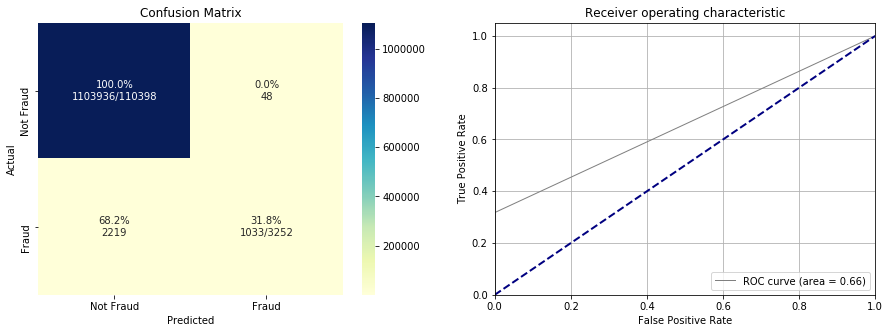

In [18]:
################################ Train and Test Models #############################
#################################   Linear SGD with 'hinge loss' without PCA   #############################



#SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier
#equal to hinge will yield behaviour such as that of a SVC with a linear kernel

from sklearn import linear_model

classifier = linear_model.SGDClassifier(loss='hinge', 
                                        penalty='l2',
                                        alpha=0.001, random_state=42,
                                        max_iter=20, tol=None)
runModel('SVM SMOTE', classifier, X_train, Y_train, X_test, Y_test)


In [21]:
######################################   LOAD unbalanced DATA SMOTE:   ################################

X_train_sm = np.genfromtxt('../../data/x_sm_train.csv', delimiter=',')
X_test = np.genfromtxt('../../data/x_test.csv', delimiter=',')

Y_train_sm=np.genfromtxt('../../data/y_sm_train.csv', delimiter=',')
Y_test=np.genfromtxt('../../data/y_test.csv', delimiter=',')
X_train_sm.shape

(3311782, 9)

==================== SVM SMOTE ====================
--- Model Fitting in 16.007304191589355 seconds ---
--- Model Predicting in 0.07140588760375977 seconds ---



Percent Accuracy: 95.936% 

Confusion Matrix : 
 [[1059299   44685]
 [    316    2936]] 

Classification Report : 
              precision    recall  f1-score   support

        0.0       1.00      0.96      0.98   1103984
        1.0       0.06      0.90      0.12      3252

avg / total       1.00      0.96      0.98   1107236
 

Area Under Curve : 
 0.9311764491007205 



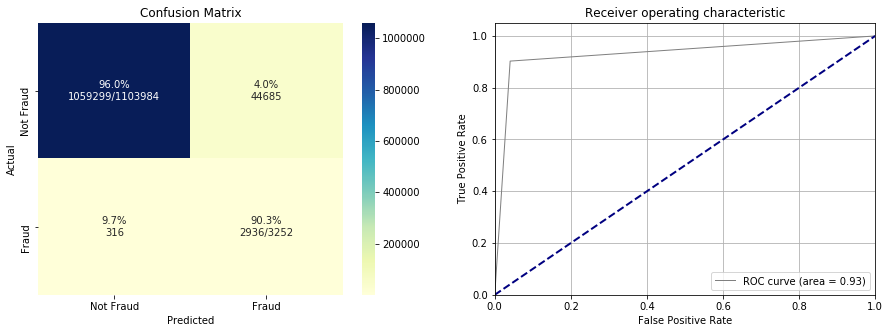

In [22]:
################################ Train and Test Models #############################
#################################   Linear SGD with 'hinge loss' with SMOTE   #############################


#SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier
#equal to hinge will yield behaviour such as that of a SVC with a linear kernel

from sklearn import linear_model

classifier = linear_model.SGDClassifier(loss='hinge', 
                                        penalty='l2',
                                        alpha=0.001, random_state=42,
                                        max_iter=20, tol=None)
runModel('SVM SMOTE', classifier, X_train_sm, Y_train_sm, X_test, Y_test)
